In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


In [2]:
#Cargando Dataset Boston
boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price']=boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
#Revisando que trae
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#creando X y Y
#Recordar que esto va a ser una regresión lineal con más de una variable
x=df.drop('Price', axis=1)
y=df.Price



In [5]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [7]:
len(x)

506

In [8]:
# Divide el 80% de los datos en el conjunto de entrenamiento mientras que el 20%
# de los datos para probar el conjunto.
# La variable test_size es donde realmente 
#especificamos la proporción del conjunto de prueba.

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2,random_state=77)



In [9]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

404
102
404
102


In [10]:
#Ajusta ambos datasets, es decir, encuentra la "mejor línea" que los hace coincidir
# El ajuste del modelo es el proceso de determinar los coeficientes 𝑏₀, 𝑏₁,…, 𝑏ᵣ
#que corresponden al mejor valor de la función de costo

linreg=LinearRegression()
linreg.fit(x_train, y_train)

# En este punto, tenemos definido el modelo de clasificación.



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#Como trabajaremos con una regresión multivariable (más de una variable independiente), se deberá
#encontrar el coeficiente más óptimo para todos nuestroa atributos
#Para ver que coeficientes eligio nuetro modelo, ejecutamos el sigueinte script
coeff_df = pd.DataFrame(linreg.coef_, x.columns, columns=['Coefficient'])
coeff_df


#Básicamente lo que nos dice es:
#A cada unidad de nuestra población que incrementamos, -15.24 será afectado
#para NOX y así para las demás variables. Esto en total nos permite ubicar 
#nuestro punto:
#target variable y, containing the function n independent variable 
#x=[x₁,x₂,x₃,…,xₙ]
#y =b₀+b₁x₁+b₂x₂+b₃x₃+…+bₙxₙ


,Coefficient
CRIM,-0.104127
ZN,0.048031
INDUS,-0.011906
CHAS,3.064590
NOX,-19.885375
RM,3.811223
AGE,0.005227
DIS,-1.614652
RAD,0.332615
TAX,-0.012847


In [12]:
#regresa donde se incerpetan los datos
# The intercept (often labeled the constant) is the expected mean value of Y when all X=0. Start with a regression equation with one predictor,
print(linreg.intercept_)

39.02480291093235


In [13]:
#Coeficiente de cada variable
print(linreg.coef_)

[-1.04127328e-01  4.80306077e-02 -1.19061769e-02  3.06459034e+00
 -1.98853751e+01  3.81122296e+00  5.22710523e-03 -1.61465224e+00
  3.32614884e-01 -1.28465736e-02 -9.65360463e-01  9.05233200e-03
 -5.58082214e-01]


In [14]:
#Basicamente, con todo esto tendríamos una ecuación así:
#y = 34.444+-2.24969255e-01*CRIM + 6.96978425e-02*ZN+...+ -5.75887237e-01*LSTAT

In [15]:
#Vuelve el coeficiente de determinación R ^ 2 de la predicción.
train_score=linreg.score(x_train, y_train)
test_score=linreg.score(x_test, y_test)

In [16]:
#Hacemos la predicción de manera lineal
predicted = linreg.predict(x_test)

In [17]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
df_pred

,Actual,Predicted
313,21.6,25.921594
139,17.8,16.100737
314,23.8,25.784393
89,28.7,31.468418
87,22.2,26.442077
...,...,...
136,17.4,15.524589
151,19.6,17.840441
177,24.6,29.830597
379,10.2,16.943577


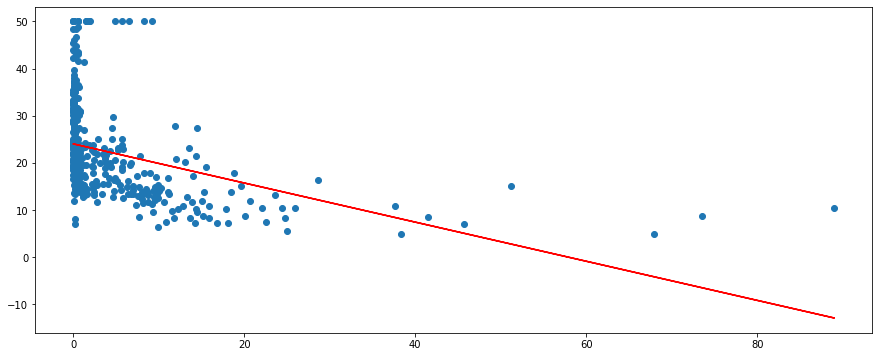

In [18]:
#Ejemplo inventado para visualuzar línea de mejor fit.
#  values lo convierte en una matriz de numpy
# -1 significa que calcula la dimensión de las filas, pero tiene 1 columna
#necesario para linreg.
x_1var = df.CRIM.values.reshape(-1, 1)
linreg_test=LinearRegression()
linreg_test.fit(x_1var, y)
predicted_sample = linreg_test.predict(x_1var)
fig = plt.figure(facecolor='w',figsize=(15, 6))
plt.scatter(x_1var, y)
plt.plot(x_1var, predicted_sample, color='red')
plt.show()


In [19]:

from sklearn import metrics
# Una MAE pequeña sugiere que el modelo es excelente para la predicción,
# mientras que un MAE grande sugiere que su modelo puede tener problemas 
#en ciertas áreas.
# Un MAE de 0 significa que su modelo es un predictor perfecto
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))


Mean Absolute Error: 3.3699009048812454


In [20]:
# Esto finalmente significa que los outliers en nuestros datos
# van a generar un error total mucho mayor en el MSE que en el MAE
# Esto quiere decir que las grandes diferencias entre los valores actuales
# y predichos son castigados más en MSE que en MAE.
# Cuanto mayor sea el número, mayor será el error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))

Mean Squared Error: 18.929248330112955


In [21]:
#El RMSE es análogo a la desviación estándar (MSE a varianza)
#y es una medida de la extensión de sus residuos.

# This tells us heuristically that RMSE can be thought of as some kind of 
# (normalized) distance between the vector of predicted values and the vector of observed values.

# In data science, RMSE has a double purpose:
# To serve as a heuristic for training models
# To evaluate trained models for usefulness / accuracy
# This raises an important question: What does it mean for RMSE to be “small”?
# We should note first and foremost that “small” will depend on our choice of units, 
# and on the specific application we are hoping for. 100 inches is a big error in a building design, 
# but 100 nanometers is not. On the other hand, 100 nanometers is a small error in fabricating an ice cube tray, but perhaps a big error in fabricating an integrated circuit.

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))


Root Mean Squared Error: 4.350775600983456


In [22]:
#score () devuelve el coeficiente de determinación, o R²,
#para los datos que le pasemos. Su máximo es 1.
# Cuanto mayor sea el valor R², mejor será el ajuste
#Entre más cercano este de 1, mejor ajustado será nuestra regresión
print(f'Valor R2 :{train_score, test_score}')

Valor R2 :(0.7398204023122792, 0.7269774874059808)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0.7802673059360946

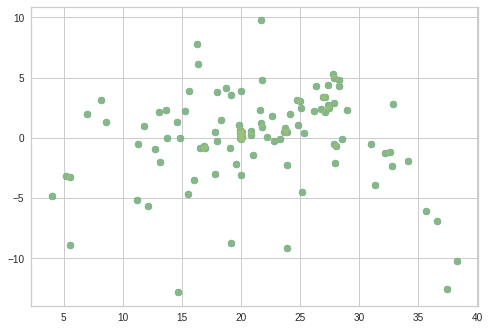

In [23]:
# Como podemos ver, los puntos se distribuyen aleatoriamente alrededor de 0,
#lo cual significa que  de regresión lineal es un modelo apropiado 
#para predecir nuestros datos.
#Si el gráfico de residuos presenta una curvatura, el supuesto de la linealidad
# es incorrecto por lo cual una función no lineal 
#será más adecuada para predecir los datos
from yellowbrick.regressor import ResidualsPlot
import seaborn as sns
visualizer = ResidualsPlot(linreg, hist=False)
visualizer.fit(x_test, y_test)
visualizer.score(x_test, y_test)

In [24]:
#Usando regresión de Ridge
#Con un alpha default de 1
rr = Ridge()
rr.fit(x_train, y_train)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
#Alpha = a 100
rr100 = Ridge(alpha=100) 
rr100.fit(x_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [26]:
#R^2 de Ridge 100 y Ridge normal
Ridge_train_score = rr.score(x_train,y_train)
Ridge_test_score = rr.score(x_test, y_test)
Ridge_train_score100 = rr100.score(x_train,y_train)
Ridge_test_score100 = rr100.score(x_test, y_test)


In [27]:
#Ejecutamos prediccion con Ridge = 100
predicted = rr100.predict(x_test)

In [28]:
#Vemos actual vs predicted con Ridge
df_predicted_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
df_predicted_ridge

,Actual,Predicted
313,21.6,26.862535
139,17.8,15.410713
314,23.8,26.099423
89,28.7,30.920117
87,22.2,26.520679
...,...,...
136,17.4,15.558216
151,19.6,23.877787
177,24.6,30.645282
379,10.2,15.996422


In [29]:
#R^2 de cada una de las regresiones
#Aquí vemos que Ridge = 1 y Linear Regression son casi la mismo
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)


linear regression train score: 0.7398204023122792
linear regression test score: 0.7269774874059808
ridge regression train score low alpha: 0.7370295674009032
ridge regression test score low alpha: 0.7306005477249629
ridge regression train score high alpha: 0.7127107311732339
ridge regression test score high alpha: 0.7117154080482149


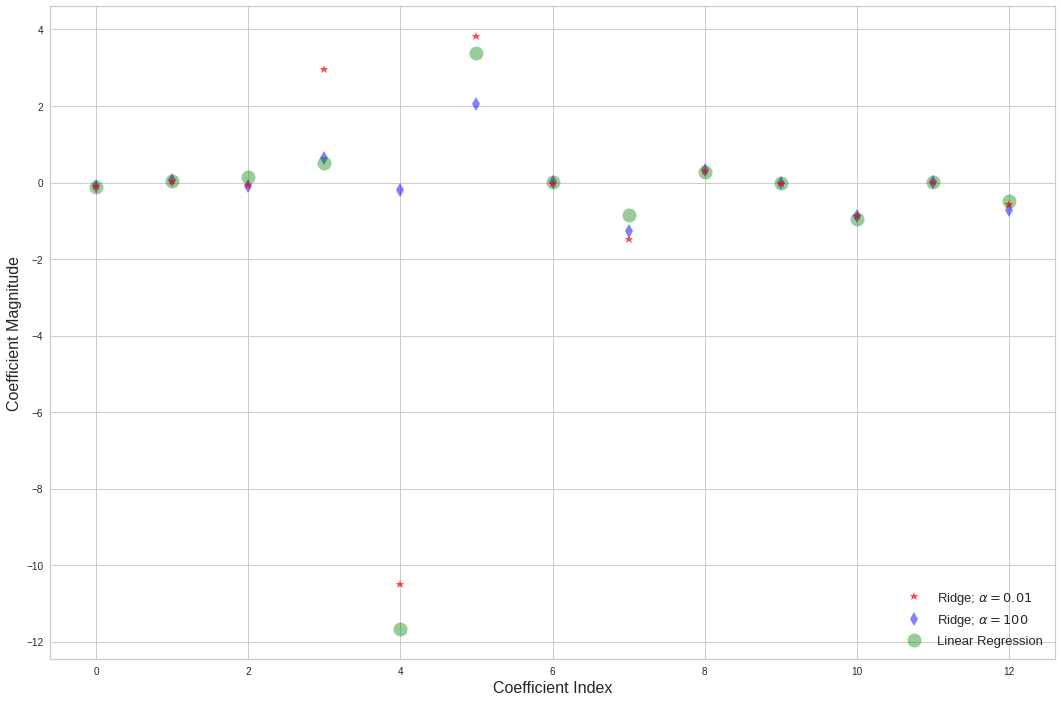

In [30]:
#Con esto podemos ver que tanto nos ajusta el modelo nuestro Ridge
#Para nuestra variable 4 (NOX) que seguramente tiene mucho outlier/BIAS
#La regresión lineal no es muy buena ya que la magnitud del coeficiente es muy negativa
#al usar ridge con alpga = 100 la mauorita de los indices tienden a cero lo cual permite
#tener nuestros datos regularizados.
fig = plt.figure(facecolor='w',figsize=(18, 12))
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=9,\
         color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=10,\
         color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(linreg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=14,\
         color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()
#La regresión de mínimos cuadrados no se define en absoluto cuando el número de
#predictores excede el número de observaciones; 
#No diferencia los predictores "importantes" de los "menos importantes" en un 
#modelo, por lo que los incluye a todos. Esto lleva a sobreajustar un modelo y 
#no encontrar soluciones únicas. Los mínimos cuadrados también tienen problemas 
#relacionados con la multicolinealidad en los datos. 
#La regresión de crestas evita todos estos problemas. 
#Funciona en parte porque no requiere estimadores insesgados; 
#Si bien los mínimos cuadrados producen estimaciones no sesgadas, 
#las varianzas pueden ser tan grandes que pueden ser totalmente inexactas.
# La regresión de crestas agrega el sesgo suficiente para hacer que las 
#estimaciones sean aproximaciones razonablemente confiables a los valores reales de la población.